<a href="https://colab.research.google.com/github/Himanshu0101-dev/Himanshu0101-dev/blob/main/Brain_MRI_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir_drive = "/content/drive/MyDrive/braintumormri /train"
val_dir_drive   = "/content/drive/MyDrive/braintumormri /valid"
test_dir_drive  = "/content/drive/MyDrive/braintumormri /test"


train_dir = "/content/brain_tumor_dataset/train"
val_dir   = "/content/brain_tumor_dataset/valid"
test_dir  = "/content/brain_tumor_dataset/test"


if not os.path.exists(train_dir):
    shutil.copytree(train_dir_drive, train_dir)
else:
    print("Train directory already copied.")

if not os.path.exists(val_dir):
    shutil.copytree(val_dir_drive, val_dir)
else:
    print("Validation directory already copied.")

if not os.path.exists(test_dir):
    shutil.copytree(test_dir_drive, test_dir)
else:
    print("Test directory already copied.")



In [ ]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 16


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=False,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.05
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


NameError: name 'train_dir' is not defined

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False


In [ ]:

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=20,
                    callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 338ms/step - accuracy: 0.4140 - loss: 1.4148 - val_accuracy: 0.6773 - val_loss: 0.8335
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 336ms/step - accuracy: 0.6642 - loss: 0.8701 - val_accuracy: 0.7709 - val_loss: 0.6554
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 353ms/step - accuracy: 0.7133 - loss: 0.7274 - val_accuracy: 0.7829 - val_loss: 0.5814
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 337ms/step - accuracy: 0.7613 - loss: 0.6292 - val_accuracy: 0.7849 - val_loss: 0.5603
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 336ms/step - accuracy: 0.8067 - loss: 0.5206 - val_accuracy: 0.8127 - val_loss: 0.5159
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 353ms/step - accuracy: 0.8009 - loss: 0.5144 - val_accuracy: 0.8327 - val_loss: 0.4707
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 318ms/step - accuracy: 0.8006 - loss: 0.4978 - val_accuracy: 0.8267 - val_loss: 0.4581
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 334ms/step - accuracy: 0.8513 - loss: 0

In [ ]:

base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_data, validation_data=val_data, epochs=5, callbacks=[early_stop])


Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 57s 422ms/step - accuracy: 0.3588 - loss: 2.6751 - val_accuracy: 0.8506 - val_loss: 0.4521
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 414ms/step - accuracy: 0.6162 - loss: 1.0435 - val_accuracy: 0.8267 - val_loss: 0.4839
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 423ms/step - accuracy: 0.7475 - loss: 0.7092 - val_accuracy: 0.8267 - val_loss: 0.4800
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 51s 468ms/step - accuracy: 0.7924 - loss: 0.5703 - val_accuracy: 0.8446 - val_loss: 0.4406
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 417ms/step - accuracy: 0.8181 - loss: 0.5278 - val_accuracy: 0.8446 - val_loss: 0.4423


In [ ]:
  loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - accuracy: 0.8569 - loss: 0.4743
Test Accuracy: 0.8252


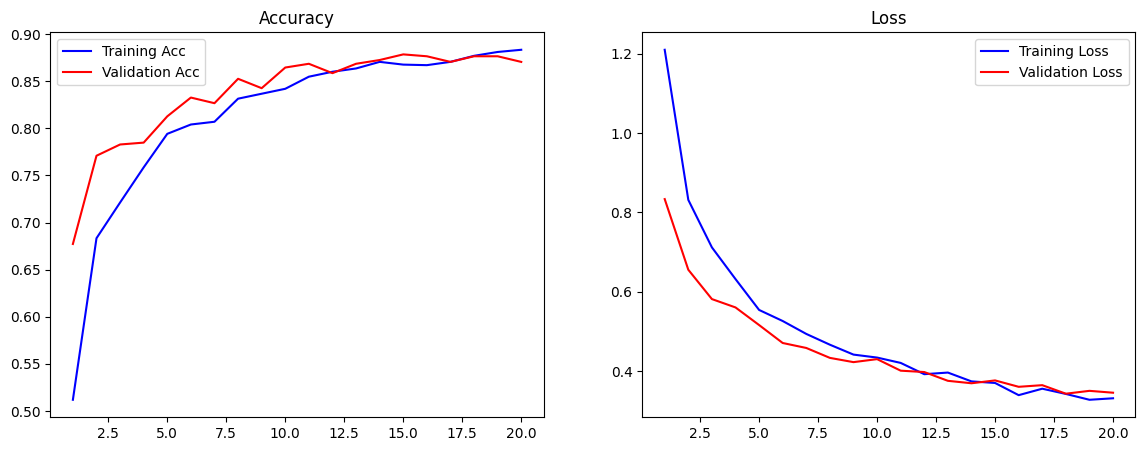

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation Acc')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)


In [ ]:
model.save('brain_mri_model.h5')
